0       8724
1      10273
2      10666
3      11036
4      10161
       ...  
254    21058
255    20892
256    22519
257    22973
258    29076
Length: 259, dtype: int64


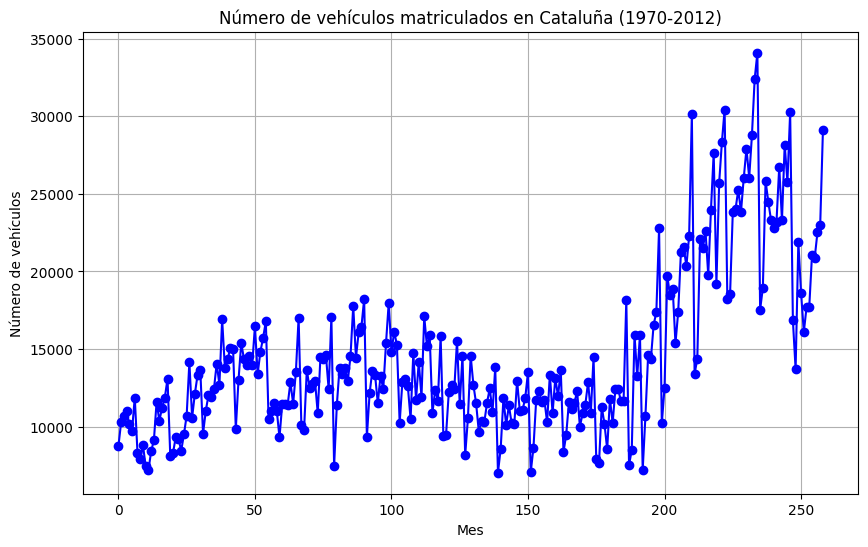

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from Models.sarimax.sarimax import Sarimax
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Nombre de vehicles matriculats a Catalunya. Dades mensuals des de 1970 fins a 2012
# Datos de vehículos matriculados en Cataluña 
data = [8724, 10273, 10666, 11036, 10161, 9743, 11876, 8309, 7892, 8801, 7450, 7186, 8418, 9110, 11607, 10372, 11223, 11863, 13089, 8116, 8297, 9321, 9234, 8445, 9494, 10709, 14159, 10582, 12111, 13324, 13634, 9544, 11016, 12032, 11901, 12431, 14067, 12701, 16905, 13778, 14341, 15054, 14997, 9856, 13027, 15399, 14335, 13974, 14559, 13988, 16459, 13398, 14813, 15727, 16777, 10524, 10977, 11535, 11032, 9306, 11450, 11447, 11422, 12865, 11469, 13529, 17016, 10130, 9807, 13655, 12495, 12747, 12937, 10867, 14516, 14374, 14608, 12413, 17051, 7456, 11405, 13806, 13402, 13807, 12914, 14529, 17770, 14449, 16091, 16425, 18217, 9335, 12160, 13606, 13313, 11512, 13288, 12420, 15359, 17991, 14788, 16128, 15253, 10246, 12873, 13063, 12590, 10493, 14729, 11737, 14187, 11908, 17098, 15181, 15882, 10862, 12369, 11682, 15839, 9425, 9492, 12226, 12714, 12404, 15530, 11438, 14554, 8170, 10538, 14576, 12695, 11492, 9657, 10334, 10281, 11537, 12471, 10939, 13814, 7032, 8589, 11821, 10094, 11365, 10234, 10182, 12972, 11010, 11048, 11874, 13513, 7062, 8640, 11733, 12317, 11591, 11722, 10269, 13351, 10871, 13148, 11949, 13661, 8356, 9492, 11609, 11142, 11550, 12265, 9991, 10861, 11426, 12870, 10891, 14464, 7899, 7643, 11279, 10177, 8536, 11786, 10228, 12420, 12446, 11648, 11659, 18167, 7525, 8506, 15915, 13248, 15909, 7210, 10681, 14634, 14356, 16551, 17376, 22797, 10204, 12513, 19732, 18458, 18867, 15363, 17383, 21249, 21555, 20342, 22260, 30121, 13408, 14345, 22060, 21480, 22603, 19768, 23975, 27634, 19217, 25698, 28324, 30418, 18205, 18544, 23849, 24018, 25258, 23843, 26004, 27906, 26034, 28759, 32381, 34085, 17530, 18939, 25824, 24485, 23296, 22763, 23213, 26745, 23296, 28160, 25769, 30262, 16853, 13691, 21898, 18618, 16088, 17684, 17735, 21058, 20892, 22519, 22973, 29076]
ts= pd.Series(data)
print(ts)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(ts, color='blue', marker='o', linestyle='-')
plt.title('Número de vehículos matriculados en Cataluña (1970-2012)')
plt.xlabel('Mes')
plt.ylabel('Número de vehículos')
plt.grid(True)
plt.show()

1      1549.0
2       393.0
3       370.0
4      -875.0
5      -418.0
        ...  
254    3323.0
255    -166.0
256    1627.0
257     454.0
258    6103.0
Length: 258, dtype: float64


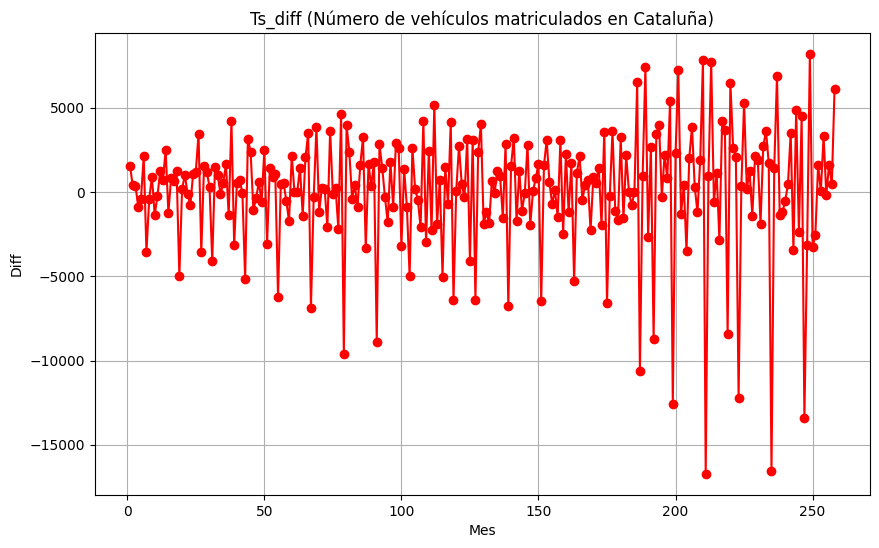

In [8]:
# Diferenciar la serie temporal
ts_diff= ts.diff().dropna()

# Imprimir la serie diferenciada
print(ts_diff)

plt.figure(figsize=(10, 6))
plt.plot(ts_diff, color='red', marker='o', linestyle='-')
plt.title('Ts_diff (Número de vehículos matriculados en Cataluña)')
plt.xlabel('Mes')
plt.ylabel('Diff')
plt.grid(True)
plt.show()

In [9]:
# Realizar el Test de Dickey-Fuller
resultado_test = adfuller(ts_diff)

# Imprimir el resultado del Test de Dickey-Fuller
print('Estadística de Dickey-Fuller:', resultado_test[0])
print('Valor p:', resultado_test[1])
print('Valores críticos:', resultado_test[4])

Estadística de Dickey-Fuller: -2.4882391230870415
Valor p: 0.11836215989056043
Valores críticos: {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}


2     -1156.0
3       -23.0
4     -1245.0
5       457.0
6      2551.0
        ...  
254    3272.0
255   -3489.0
256    1793.0
257   -1173.0
258    5649.0
Length: 257, dtype: float64


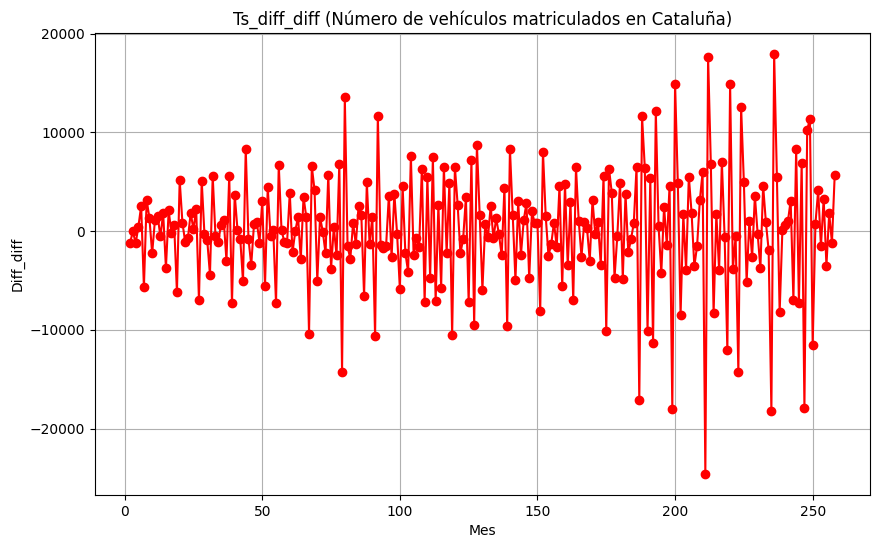

In [10]:
# Diferenciar la serie temporal nuevamente
ts_diff_diff = ts_diff.diff().dropna()

# Imprimir la serie diferenciada nuevamente
print(ts_diff_diff)

plt.figure(figsize=(10, 6))
plt.plot(ts_diff_diff, color='red', marker='o', linestyle='-')
plt.title('Ts_diff_diff (Número de vehículos matriculados en Cataluña)')
plt.xlabel('Mes')
plt.ylabel('Diff_diff')
plt.grid(True)
plt.show()


In [11]:
# Realizar el Test de Dickey-Fuller
resultado_test = adfuller(ts_diff_diff)

# Imprimir el resultado del Test de Dickey-Fuller
print('Estadística de Dickey-Fuller:', resultado_test[0])
print('Valor p:', resultado_test[1])
print('Valores críticos:', resultado_test[4])

Estadística de Dickey-Fuller: -9.596599649607507
Valor p: 1.970743050812523e-16
Valores críticos: {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}


In [16]:
model=auto_arima(ts, seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4879.347, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4966.198, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4936.261, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4882.051, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4964.322, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4880.874, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4879.948, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4878.839, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4877.490, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4878.043, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4877.571, Time=0.05 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
T

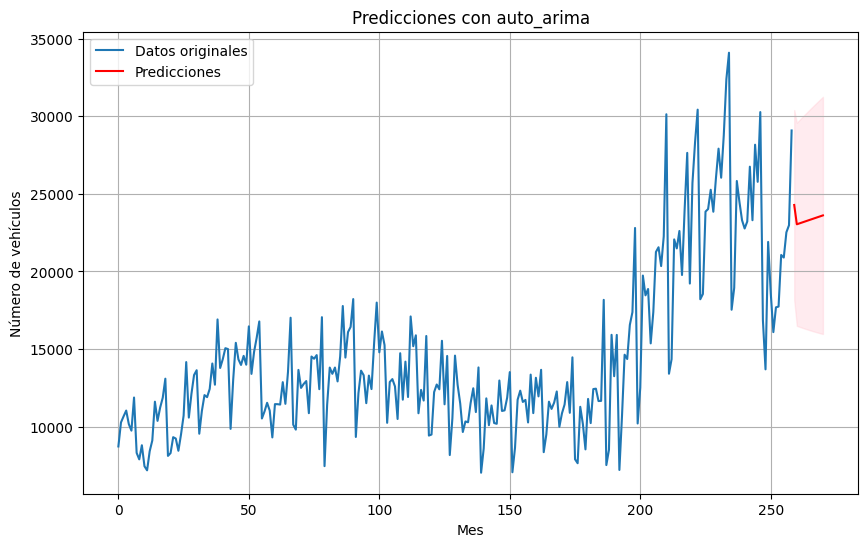

In [18]:
n_periods = 12  # Número de períodos a predecir
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

plt.figure(figsize=(10, 6))
plt.plot(ts, label='Datos originales')
plt.plot(pd.Series(forecast, index=pd.RangeIndex(start=len(ts), stop=len(ts) + n_periods)), color='red', label='Predicciones')
plt.fill_between(pd.Series(pd.RangeIndex(start=len(ts), stop=len(ts) + n_periods)), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Predicciones con auto_arima')
plt.xlabel('Mes')
plt.ylabel('Número de vehículos')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
model1 = auto_arima(ts, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4966.198, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4703.616, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4760.194, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4964.322, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4936.261, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4677.056, Time=1.06 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4813.703, Time=0.32 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4694.573, Time=2.07 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=4685.364, Time=1.59 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4769.503, Time=0.82 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4726.183, Time=0.55 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

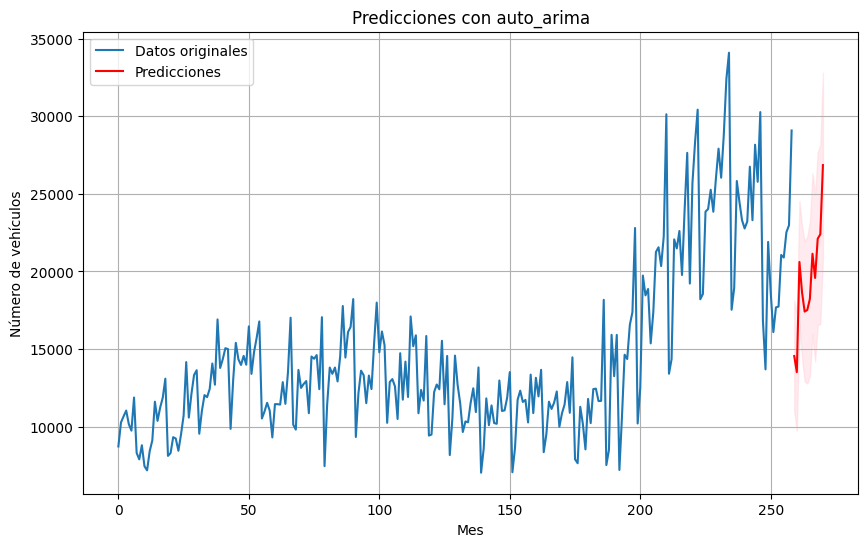

In [31]:
n_periods = 12 # Número de períodos a predecir
forecast, conf_int = model1.predict(n_periods=n_periods, return_conf_int=True)

plt.figure(figsize=(10, 6))
plt.plot(ts, label='Datos originales')
plt.plot(pd.Series(forecast, index=pd.RangeIndex(start=len(ts), stop=len(ts) + n_periods)), color='red', label='Predicciones')
plt.fill_between(pd.Series(pd.RangeIndex(start=len(ts), stop=len(ts) + n_periods)), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Predicciones con auto_arima')
plt.xlabel('Mes')
plt.ylabel('Número de vehículos')
plt.legend()
plt.grid(True)
plt.show()